In [1]:
# Importing necessary libraries
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data
df = pd.read_csv('Leads.csv')

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
# Lets' check the quality of data with percentage of missing values
round(100*df.isnull().sum()/len(df),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [6]:
df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

# Univariate and Bi-variate Analysis

In [7]:
# Function to plot categorical variable
def categorical_variable(df,col):
    plt.figure(figsize=(10,5))
    sns.countplot(x=col,hue = 'Converted',data=df)
    plt.xticks(rotation=90)

In [8]:
# Function to plot numerical variable
def numerical_variable(df,col):
    sns.FacetGrid(data=df,col='Converted',aspect=2,height=3).map(sns.distplot,col)

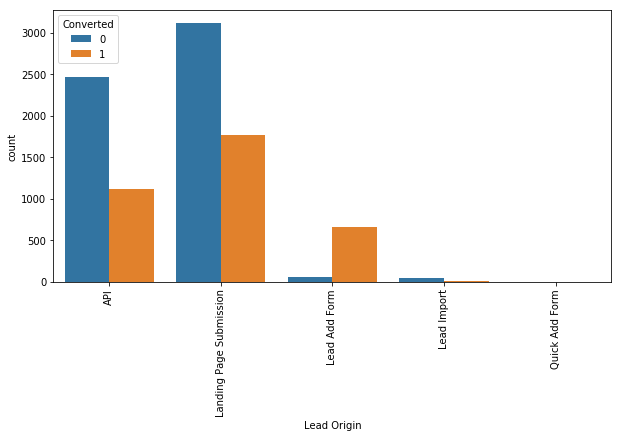

In [9]:
categorical_variable(df,'Lead Origin')

"Lead Origin" column consists of 5 categories, we can eliminate "Quick Add Form" category as it is not significant and only one record

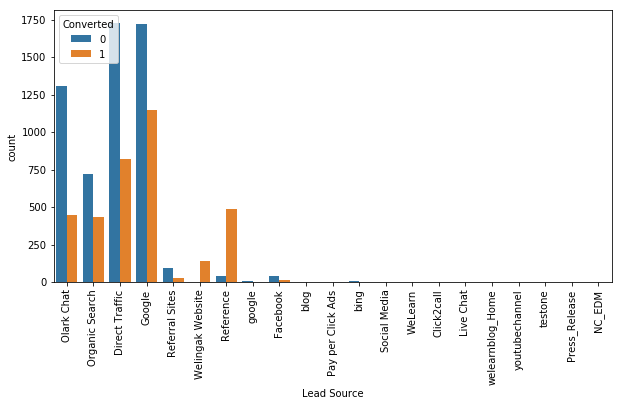

In [10]:
categorical_variable(df,'Lead Source')

From the above graph, Lead mainly depends on "Google Search, Direct Traffic,Reference" are the main contributing factors. Here there are other factors but they are not contributing for lead, so we can eliminate them as their values also very negligible.

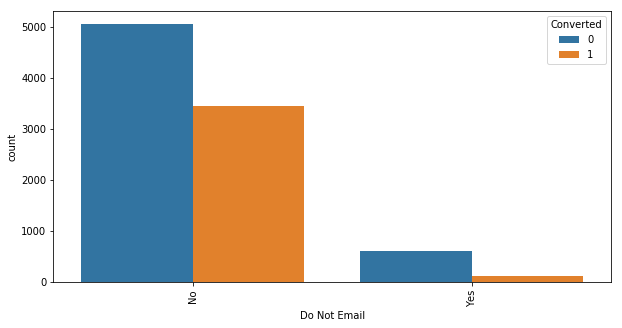

In [11]:
categorical_variable(df,'Do Not Email')

Majority of the promising leads opted for "Do not Email" to "No"

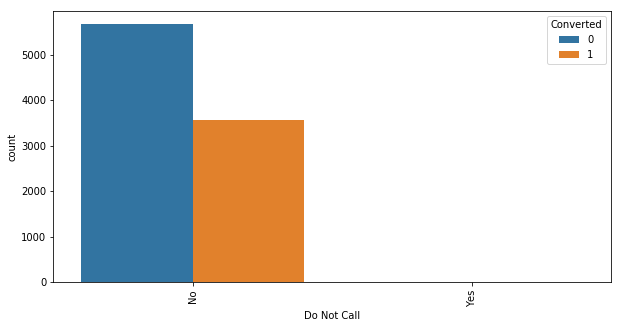

In [12]:
categorical_variable(df,'Do Not Call')

All Leads opted for calls, so they set "Do Not Call" to "No"

In [13]:
# Our Target variable
df['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

There are 5,679 - 0's and 3,561-1's. Eventhough there are more 0's than 1's but it is in the permissible level only. So, no need to worry about class imbalance problem

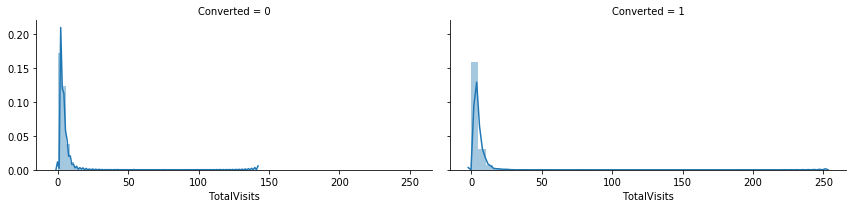

In [14]:
numerical_variable(df,'TotalVisits')

So, from the above graph 'TotalVisits' is following the same trend for both Lead and non Lead for conversion.

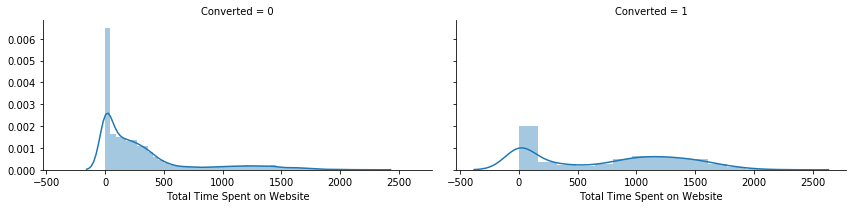

In [15]:
numerical_variable(df,'Total Time Spent on Website')

From the above graph it is clear that, if the 'Total Time Spent on Website' is in minutes then promising leads are spending more time with the range of 500 - 2000 minutes

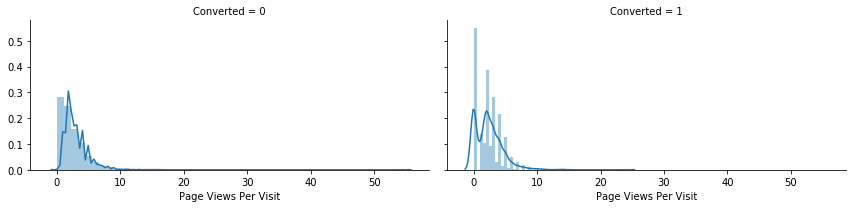

In [16]:
numerical_variable(df,'Page Views Per Visit')

From the above graph promising Leads are visiting few pages more time than other pages

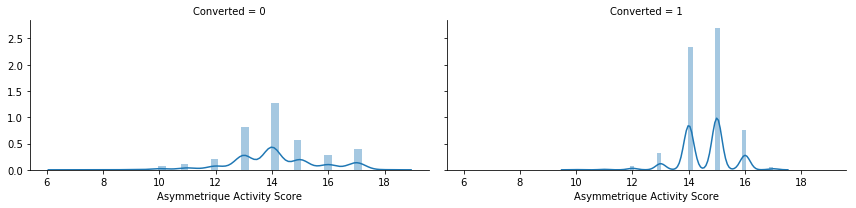

In [17]:
numerical_variable(df,'Asymmetrique Activity Score')

Asymmetrique Activity score is high for the customers at 14 and 15 for promising leads

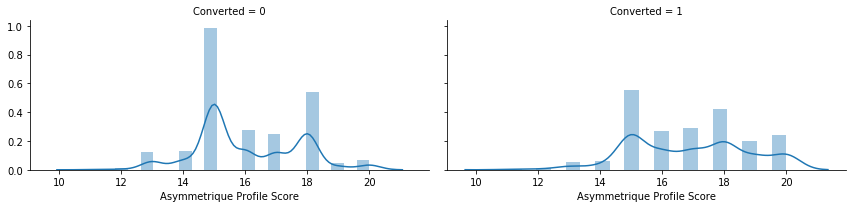

In [18]:
numerical_variable(df,'Asymmetrique Profile Score')

Asymmetrique profile score assigned is follows bit high for 19 and 20 for the  promising leads

In [19]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In the **last activity** column there are 17 categories but we will take the most import categories which are contributing more to our dataset

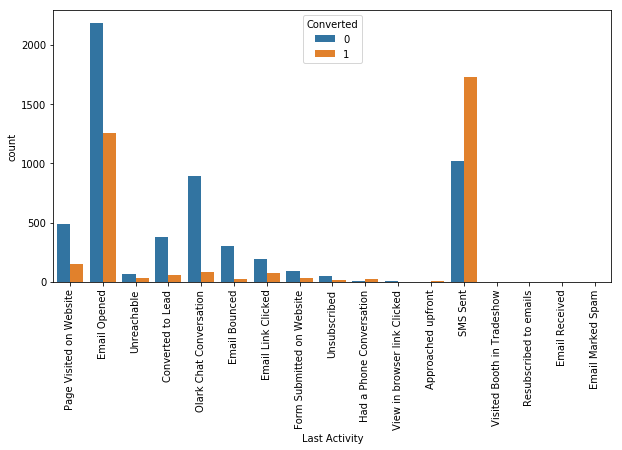

In [20]:
categorical_variable(df,'Last Activity')

From the above graph, Email opened and SMS Sent has more promising leads than others

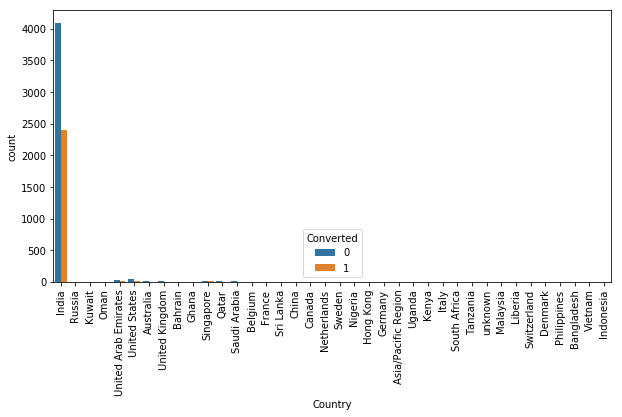

In [21]:
categorical_variable(df,'Country')

So, from the above graph it is clear that promising leads are mainly belongs to "India" only compare to other countries

In [22]:
df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

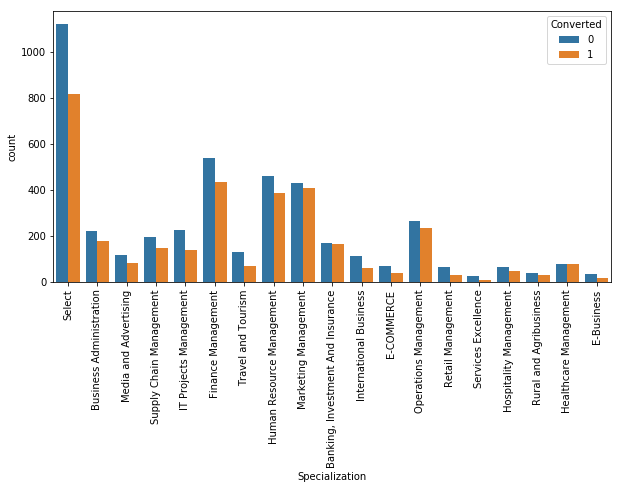

In [23]:
categorical_variable(df,'Specialization')

From the **specialization** graph, many promising leads are not selected the specialization. There may be reason that their specialization is not available in the dropdown list or may be they don't want to disclose it. So we have to consider this select category also instead of removing.

In [24]:
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

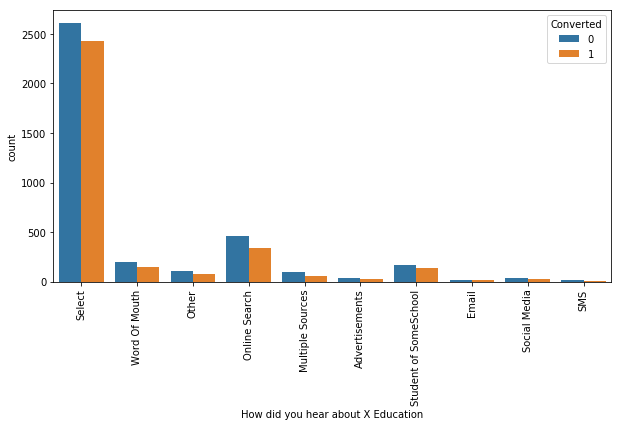

In [25]:
categorical_variable(df,'How did you hear about X Education')

Here also many promising leads not selected the source from where they hear about it. So we shouldn't remove select column from here also.

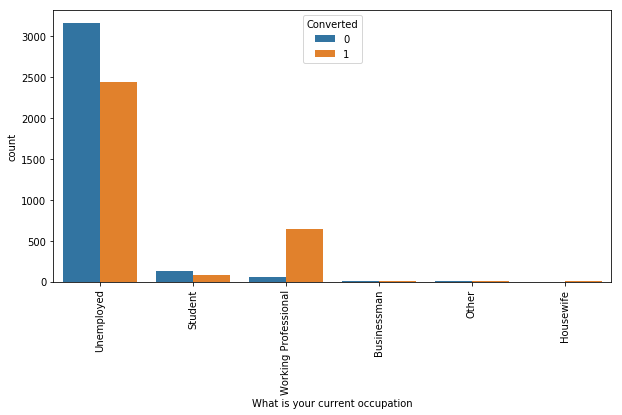

In [26]:
categorical_variable(df,'What is your current occupation')

So mainly Un employed and working professionals are playing major role behind promising leads

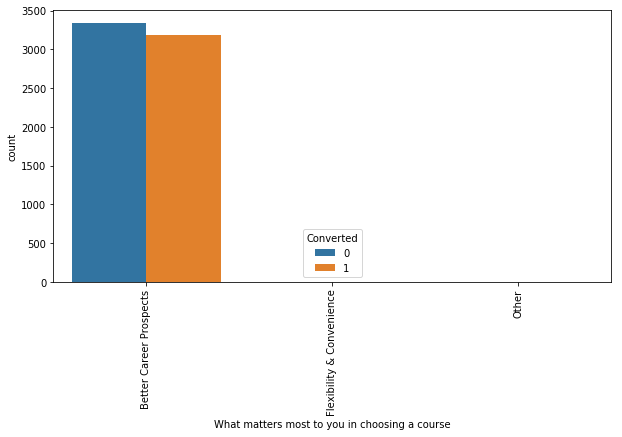

In [27]:
categorical_variable(df,'What matters most to you in choosing a course')

Many promising leads are looking for "better career prospects"

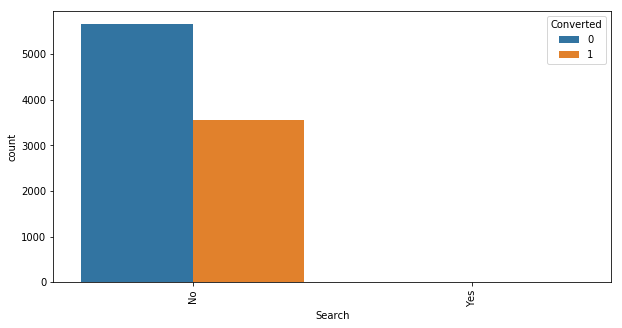

In [28]:
categorical_variable(df,'Search')

Promising leads didn't see any ad on search. So we can remove this variable

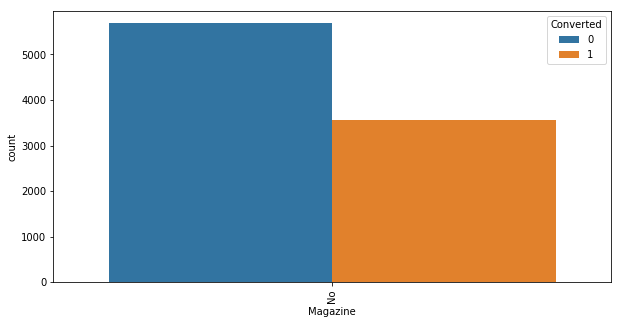

In [29]:
categorical_variable(df,'Magazine')

All promising leads didn't see Magazine, so we can remove this variable

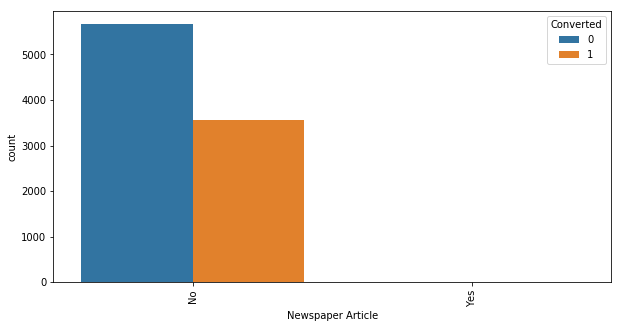

In [30]:
categorical_variable(df,'Newspaper Article')

All promising leads didn't see Newspaper Article, so we can remove this variable

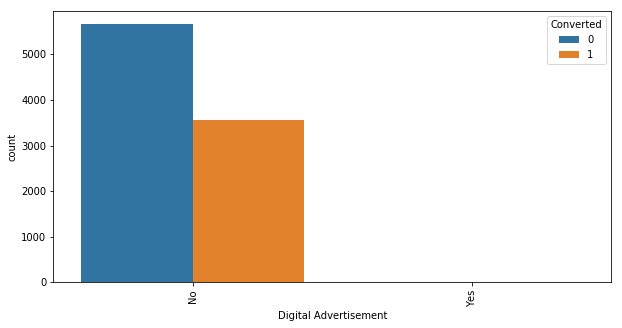

In [31]:
categorical_variable(df,'Digital Advertisement')

So, none of the ad's are not creating impact of Promising leads conversion. It is better to remove all the ad related variables like, search, newspaper, magazine, Digital advertisement

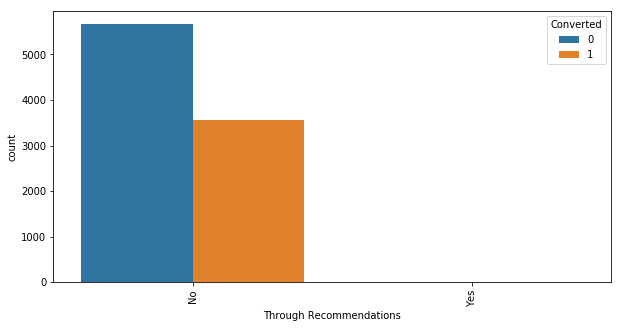

In [32]:
categorical_variable(df,'Through Recommendations')

So none of the promising leads came through recommendations. So better to remove this variable.

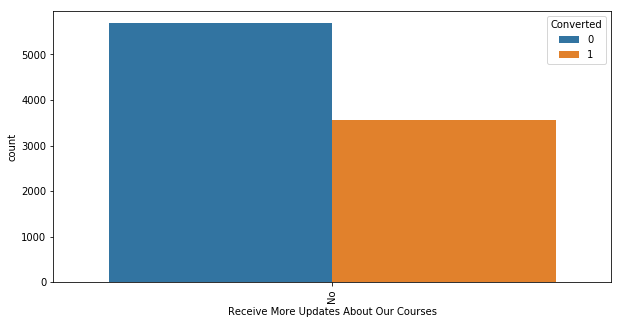

In [33]:
categorical_variable(df,'Receive More Updates About Our Courses')

None of the customers chose to receive more updates about courses. So better to remove this variable also

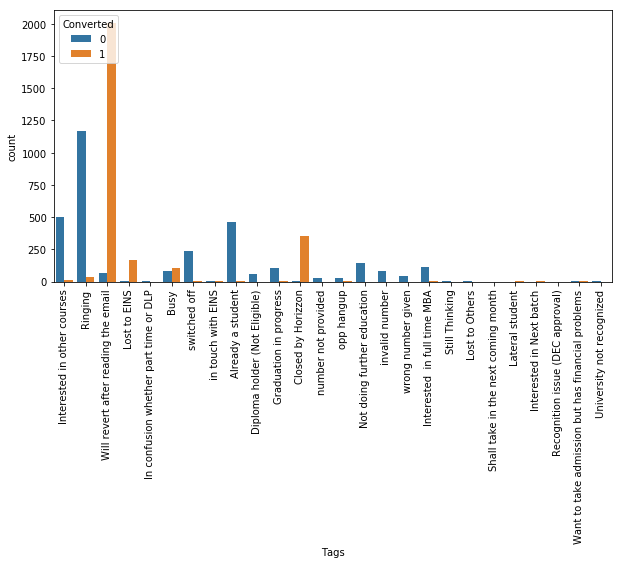

In [34]:
categorical_variable(df,'Tags')

From the above graph, promising leads used the "will revert after reading the email" option mostly compare to others

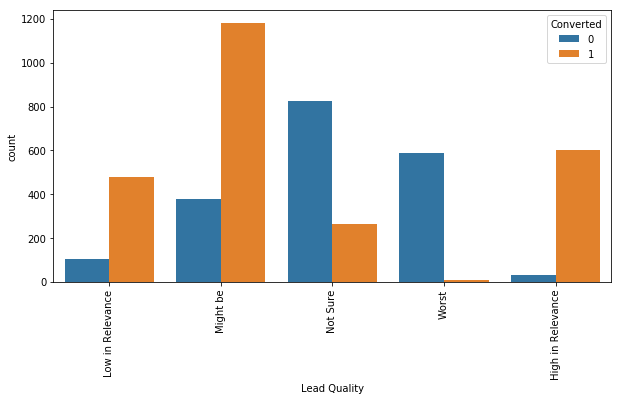

In [35]:
categorical_variable(df,'Lead Quality')

As per the data Lead quality belongs to worst is very less. So as far it is classified mainly under 'migjht be'

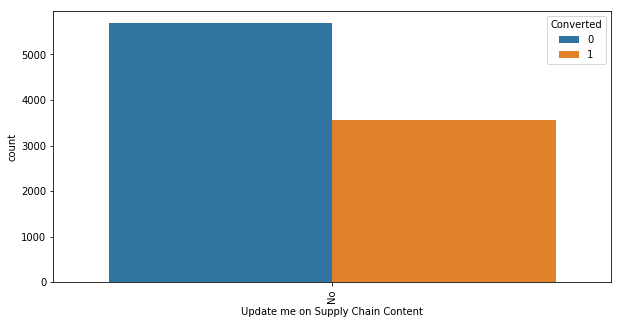

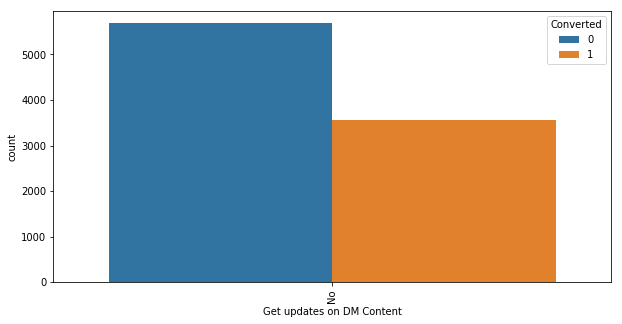

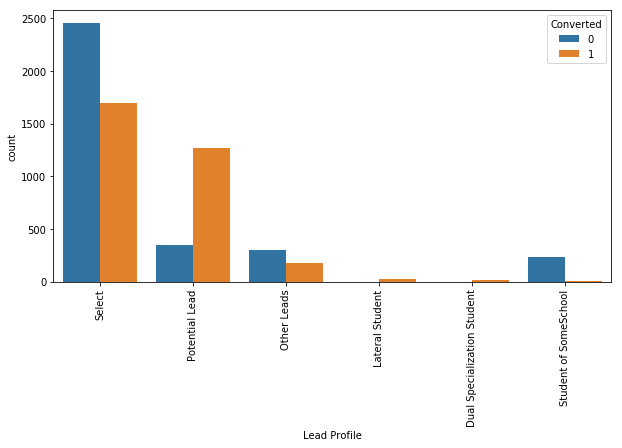

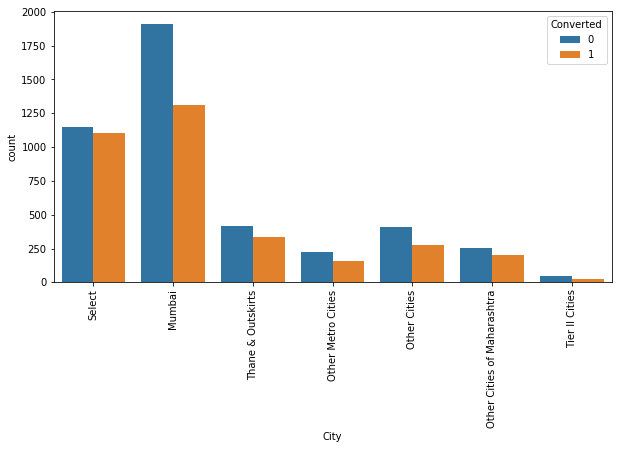

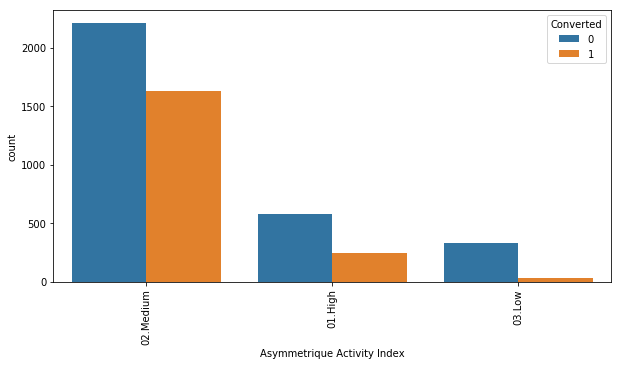

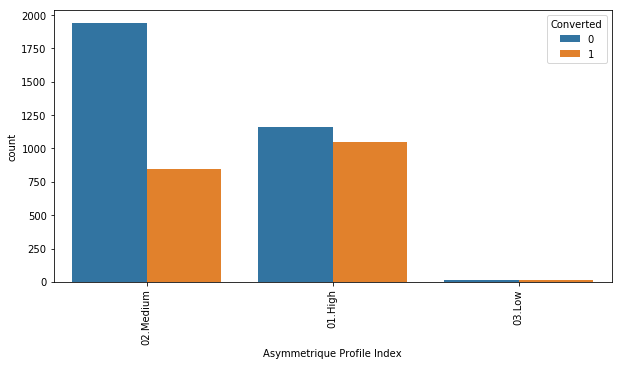

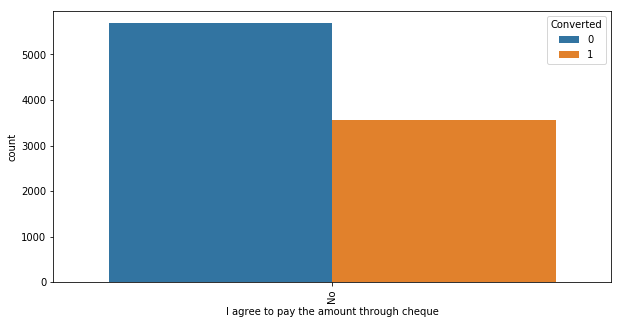

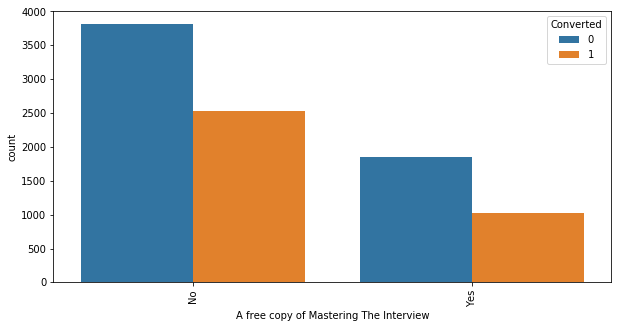

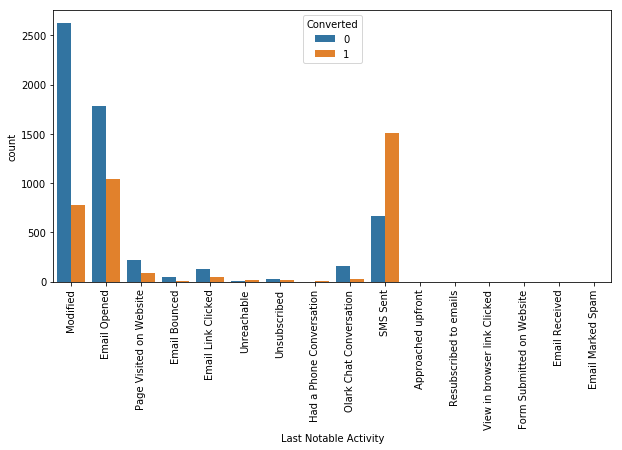

In [36]:
categorical_variable(df,'Update me on Supply Chain Content')
categorical_variable(df,'Get updates on DM Content')
categorical_variable(df,'Lead Profile')
categorical_variable(df,'City')
categorical_variable(df,'Asymmetrique Activity Index')
categorical_variable(df,'Asymmetrique Profile Index')
categorical_variable(df,'I agree to pay the amount through cheque')
categorical_variable(df,'A free copy of Mastering The Interview')
categorical_variable(df,'Last Notable Activity')

**From above graphs:**
   - None of the Leads selected 'Update me on Supply Chain Content','Get updates on DM Content' and 'I agree to pay the amount through cheque'. We can remove these columns
   - In the "Lead Profile" column we have select categories which are not mentioned under which profile but it consist of promising leads, so we should not remove it.
   - Few of the customer 'city' is not noted, so it is coming under 'select' category but it consists of Leads.
   - "A free copy of mastering the interview" has equal priority in both cases for Promising Leads
   - In the 'Last Notable Activity' SMS sent has high priority leads. There are few categories which are not contributing anything to our data. We can ignore them

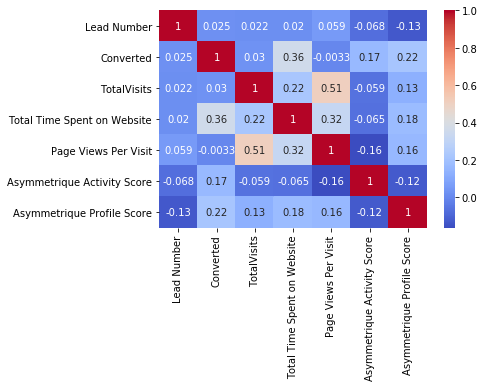

In [37]:
# Correlation among variables
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

- **From the above correlation plot:**
    - "Total time spent on website", "Asymmetrique Activity Score" and "Asymmetrique Profile Score" are correlated with Target variable - "Converted"
    - "Total visits" correlated with  "Time spent on website", "Asymmetrique Profile Scor" and "Page views per visit"

# Data Cleaning and Missing value Imputation

In [38]:
# Lets' check the quality of data with percentage of missing values
round(100*df.isnull().sum()/len(df),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [39]:
# Function to impute missing values in categorical variable
def mode_function(data,col):
    return data[col].fillna(data[col].mode()[0])

In [40]:
# Function to impute missing values in numerical variable
def median_function(data,col):
    return data[col].fillna(data[col].median())

In [41]:
# Function to impute missing values by randomising
def random_function(data,col):
    return data[col].apply(lambda x: np.random.choice(data[col].dropna().values) if x is np.nan else x)

In [42]:
# Lead Source has 0.39% of missing values, So better to replace them with mode
df['Lead Source'] = mode_function(df,'Lead Source')

In [43]:
# Replacing missing values of TotalVisits with median value
df['TotalVisits'] = median_function(df,'TotalVisits')

In [44]:
# Replacing missing values of 'Page views per visit' with median value
df['Page Views Per Visit'] = median_function(df,'Page Views Per Visit')

In [45]:
# Replacing missing values of Last Activity values with mode
df['Last Activity'] = mode_function(df,'Last Activity')

In [46]:
# Replacing missing values of country values with mode
df['Country'] = mode_function(df,'Country')

In [47]:
df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [48]:
# There are many values as Select, So replace them with null and then fill them using random imputation
df['Specialization'] = df['Specialization'].apply( lambda x: np.nan if x=='Select' else x)

In [49]:
# Filling missing values using random choice 
df['Specialization']=random_function(df,'Specialization')

In [50]:
# Replacing Select with nan in the 'How did you hear about X Education' column
df['How did you hear about X Education'] = df['How did you hear about X Education'].apply( lambda x: np.nan if x=='Select' else x)

In [51]:
# Filling missing values using random choice 
df['How did you hear about X Education']=random_function(df,'How did you hear about X Education')

In [52]:
# Filling missing  values with mode
df['What is your current occupation'] = mode_function(df,'What is your current occupation')

In [53]:
# Filling missing  values with mode
df['What matters most to you in choosing a course'] = mode_function(df,'What matters most to you in choosing a course')

In [54]:
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [55]:
# Filling missing values using random choice 
df['Tags']=random_function(df,'Tags')

In [56]:
# df['Lead Quality'] variable has more than 50% of missing values. Imputing them is not a good method. So better to drop it   
df = df.drop('Lead Quality',axis=1)

In [62]:
# There are many values as Select in "Lead profile and City columns", So replace them with null and then fill them using random imputation
df['Lead Profile'] = df['Lead Profile'].apply( lambda x: np.nan if x=='Select' else x)
df['City'] = df['City'].apply( lambda x: np.nan if x=='Select' else x)

In [63]:
# Filling missing values using random choice 
df['Lead Profile']=random_function(df,'Lead Profile')
df['City']=random_function(df,'City')

In [73]:
#Asymmetrique Activity Index and Asymmetrique Profile Index has 45.65% of missing values. It has only 3 categories and replacing with mode will be giving biased. So better replace them using random imputation
df['Asymmetrique Activity Index']=random_function(df,'Asymmetrique Activity Index')
df['Asymmetrique Profile Index']=random_function(df,'Asymmetrique Profile Index')

In [75]:
# Now Asymmetrique Profile Score and Asymmetrique Activity Score both has 45.65 %of missing values, better to replace them using median
df['Asymmetrique Profile Score'] = median_function(df,'Asymmetrique Profile Score')
df['Asymmetrique Activity Score'] = median_function(df,'Asymmetrique Activity Score')

In [76]:
# Now let's cross check the missing values
round(100*df.isnull().sum()/len(df),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

- So all the missing values are treated successfully